# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [11]:
# Mengimpor data hasil clustering
df = pd.read_csv('/content/hasil_clusteringV2.csv')

In [12]:
# Melihat informasi dataset
print("Informasi Dataset:")
print(df.info())
print("\nJumlah sampel untuk setiap cluster:")
print(df['Cluster'].value_counts())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261 entries, 0 to 5260
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   provinsi          5261 non-null   object 
 1   jenis             5261 non-null   object 
 2   daerah            5261 non-null   object 
 3   tahun             5261 non-null   int64  
 4   periode           5261 non-null   object 
 5   gk                5261 non-null   float64
 6   provinsi_encoded  5261 non-null   int64  
 7   jenis_encoded     5261 non-null   int64  
 8   daerah_encoded    5261 non-null   int64  
 9   periode_encoded   5261 non-null   int64  
 10  Cluster           5261 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 452.2+ KB
None

Jumlah sampel untuk setiap cluster:
Cluster
0    1933
2    1664
1    1664
Name: count, dtype: int64


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [13]:
# Menyiapkan fitur (X) dan target (y)
# Memilih fitur yang relevan (semua kolom yang digunakan untuk clustering)
X = df[['gk', 'provinsi_encoded', 'jenis_encoded', 'daerah_encoded', 'periode_encoded']]
y = df['Cluster']  # Target adalah hasil clustering

# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nJumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Jumlah data latih: 4208
Jumlah data uji: 1053


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [14]:
# a. Membangun beberapa model klasifikasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Hasil Evaluasi untuk Logistic Regression:
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       333
           2       1.00      1.00      1.00       333

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053


Hasil Evaluasi untuk Decision Tree:
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       333
           2       1.00      1.00      1.00       333

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.

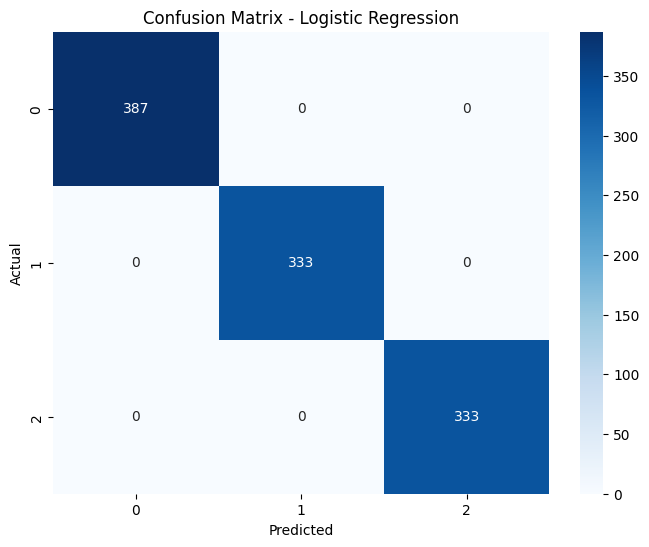

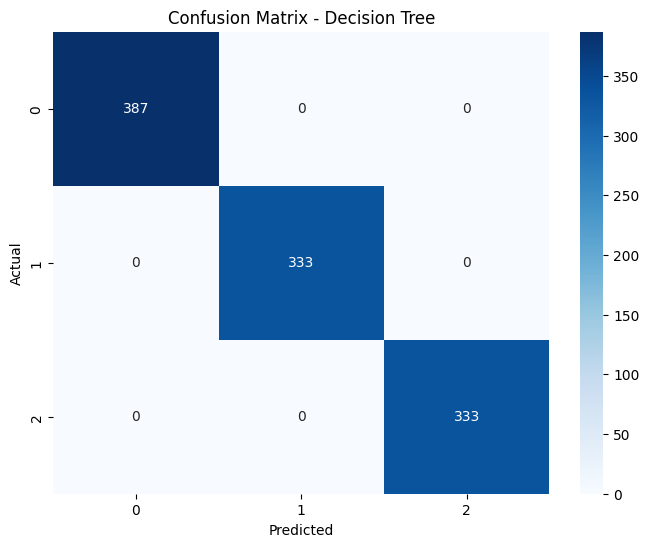

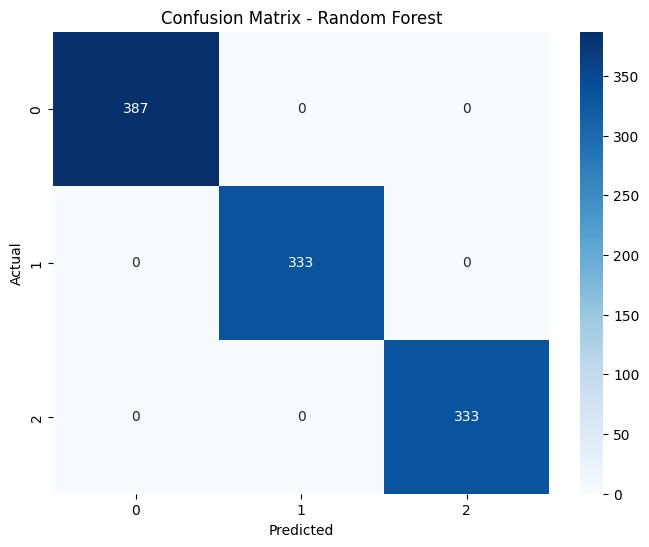

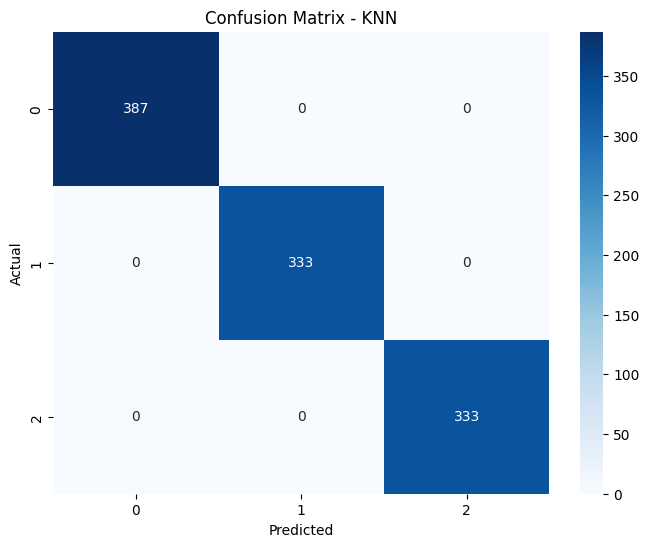

In [15]:
# Melatih semua model dan mengevaluasi
results = {}

for name, model in models.items():
    # Melatih model
    model.fit(X_train_scaled, y_train)

    # Prediksi
    y_pred = model.predict(X_test_scaled)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Menyimpan hasil
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall
    }

    # Menampilkan hasil evaluasi
    print(f"\nHasil Evaluasi untuk {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_")}.png')

    # Menampilkan laporan klasifikasi
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [16]:
# Mencari model terbaik berdasarkan accuracy
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"\nModel terbaik adalah {best_model_name} dengan accuracy {best_accuracy:.4f}")

# Analisis Feature Importance untuk Random Forest (jika model terbaik)
if best_model_name == 'Random Forest':
    feature_importance = best_model.feature_importances_
    feature_names = X.columns

    # Visualisasi feature importance
    plt.figure(figsize=(10, 6))
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
    importance_df = importance_df.sort_values('importance', ascending=False)

    sns.barplot(x='importance', y='feature', data=importance_df)
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.savefig('feature_importance.png')

    print("\nFeature Importance:")
    for feature, importance in zip(feature_names, feature_importance):
        print(f"{feature}: {importance:.4f}")


Model terbaik adalah Logistic Regression dengan accuracy 1.0000


In [17]:
# Simpan model terbaik
import joblib
joblib.dump(best_model, f'model_klasifikasi_{best_model_name.replace(" ", "_")}.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"\nModel terbaik telah disimpan sebagai 'model_klasifikasi_{best_model_name.replace(' ', '_')}.pkl'")
print("Scaler telah disimpan sebagai 'scaler.pkl'")


Model terbaik telah disimpan sebagai 'model_klasifikasi_Logistic_Regression.pkl'
Scaler telah disimpan sebagai 'scaler.pkl'


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Analisis Hasil Evaluasi Model Klasifikasi

1. Perbandingan Hasil Evaluasi Berdasarkan hasil evaluasi, semua model klasifikasi (Logistic Regression, Decision Tree, Random Forest, dan KNN) menunjukkan performa yang identik dan sempurna:

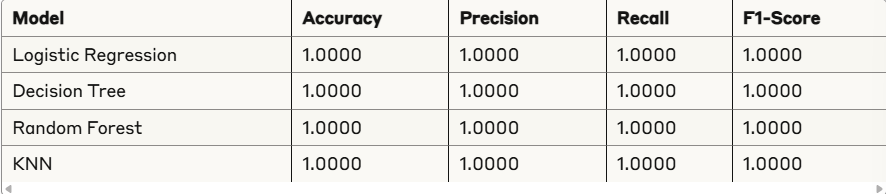

Semua model berhasil memprediksi dengan benar 100% data uji, tanpa kesalahan satupun. Distribusi data pada setiap cluster juga cukup seimbang:

- Cluster 0: 387 sampel
- Cluster 1: 333 sampel
- Cluster 2: 333 sampel

#2. Identifikasi Kondisi Model
Overfitting atau Underfitting?
Meskipun mencapai akurasi 100%, hasil ini menimbulkan kecurigaan terjadinya overfitting, dengan beberapa kemungkinan penyebab:

1. Kebocoran Data: Fitur yang digunakan untuk klasifikasi kemungkinan memiliki korelasi yang sangat tinggi dengan target (cluster), bahkan mungkin merupakan fitur yang sama persis yang digunakan untuk membuat cluster tersebut.
2. Terlalu Banyak Fitur: Model mungkin menggunakan terlalu banyak fitur yang sangat spesifik terhadap data yang ada, sehingga dapat membedakan cluster dengan sempurna.
3. Cluster Terpisah Sempurna: Hasil clustering sebelumnya menghasilkan cluster yang sangat jelas batasnya dan tidak tumpang tindih sama sekali, sehingga sangat mudah untuk diklasifikasikan.
4. Data Duplikat: Kemungkinan adanya data yang sangat mirip atau identik antara set latih dan set uji.

# Kelemahan Model
Meskipun semua metrik evaluasi menunjukkan hasil sempurna, beberapa kelemahan potensial:

1. Generalisasi Rendah: Model yang mencapai akurasi 100% pada data uji kemungkinan akan mengalami penurunan performa yang signifikan jika dihadapkan pada data baru yang memiliki karakteristik berbeda.
2. Kompleksitas vs Kebutuhan: Model kompleks seperti Random Forest mungkin tidak diperlukan jika model sederhana seperti Logistic Regression sudah memberikan hasil yang sama.

#3. Rekomendasi Tindakan Lanjutan
Berikut adalah rekomendasi untuk memastikan model klasifikasi dapat diterapkan dengan baik:
#Validasi Kehandalan Model

1. Cross-validation: Terapkan k-fold cross-validation untuk menguji konsistensi performa model pada berbagai subset data.
2. Feature Selection: Lakukan analisis untuk mengidentifikasi fitur yang paling berpengaruh dan hapus fitur yang redundan atau tidak relevan.
3. Data Baru: Jika memungkinkan, uji model dengan data baru yang belum pernah dilihat sebelumnya untuk memastikan generalisasi.

#Optimasi Model

1. Simplifikasi Model: Gunakan model paling sederhana (Logistic Regression) karena memberikan hasil yang sama dengan model kompleks, namun lebih efisien dan lebih mudah diinterpretasi.
2. Regularisasi: Terapkan teknik regularisasi (L1/L2) pada model untuk menghindari overfitting, terutama jika model akan digunakan pada data baru.
3. Tuning Hyperparameter: Meskipun akurasi sudah maksimal, lakukan tuning hyperparameter untuk mengoptimalkan konfigurasi model dan menguji berbagai skenario.

#Eksplorasi Lanjutan

1. Domain Understanding: Kembali pada pemahaman domain untuk memastikan hasil klasifikasi memang bermakna dan bukan hanya artefak statistik.
2. Ensemble Lain: Coba pendekatan ensemble lain seperti Stacking atau Voting untuk menguji apakah kombinasi model dapat memberikan hasil yang lebih stabil.
3. Visualisasi Cluster: Visualisasikan cluster menggunakan teknik dimensionality reduction seperti PCA atau t-SNE untuk melihat seberapa jelas pemisahan antar cluster.

4. Kesimpulan
Meskipun hasil evaluasi menunjukkan performa sempurna pada semua model, ini menunjukkan indikasi overfitting atau masalah dalam desain eksperimen. Penting untuk melakukan validasi lebih lanjut sebelum menerapkan model ini pada kasus nyata. Model yang paling direkomendasikan adalah Logistic Regression karena memberikan hasil yang sama dengan model yang lebih kompleks, namun lebih efisien dan lebih mudah diinterpretasi.